# Demo of Tamari interval-posets in Sage

This code is related to the paper:

[1] Grégory Châtel and Viviane Pons. [Counting smaller elements in the Tamari and m-Tamari lattices](http://arxiv.org/abs/1311.3922), Journal of Combinatorial Theory, Series A, 134():58 – 97, 2015. 

In [1]:
# local hack to show latex figures 
# on a local sage, use view
from viewLatex import viewLatex

## Creating interval-posets

In [2]:
# creating an interval-poset
ip = TamariIntervalPoset(4,[(2,1),(3,1),(2,4),(3,4)])
ip

The Tamari interval of size 4 induced by relations [(2, 4), (3, 4), (3, 1), (2, 1)]

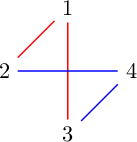

In [3]:
viewLatex(ip)

You can create the interval-poset from Binary trees or Dyck paths.

In [4]:
bt1 = BinaryTree([[None, [[], None]], None])
bt2 = BinaryTree([None, [[None, []], None]])
ip = TamariIntervalPosets.from_binary_trees(bt1,bt2)
ip

The Tamari interval of size 4 induced by relations [(2, 4), (3, 4), (3, 1), (2, 1)]

In [5]:
ip = bt1.tamari_interval(bt2)
ip

The Tamari interval of size 4 induced by relations [(2, 4), (3, 4), (3, 1), (2, 1)]

In [6]:
dw1 = DyckWord([1, 1, 0, 1, 0, 0, 1, 0])
dw2 = DyckWord([1, 1, 1, 0, 0, 1, 0, 0])
ip = TamariIntervalPosets.from_dyck_words(dw1,dw2)
ip

The Tamari interval of size 4 induced by relations [(2, 4), (3, 4), (3, 1), (2, 1)]

In [7]:
ip = dw1.tamari_interval(dw2)
ip

The Tamari interval of size 4 induced by relations [(2, 4), (3, 4), (3, 1), (2, 1)]

## Some basic computations

Computing its endpoints as binary trees and list the binary trees of the interval. 

In [9]:
print(ip.lower_binary_tree())
print(ip.upper_binary_tree())

[[., [[., .], .]], .]
[., [[., [., .]], .]]


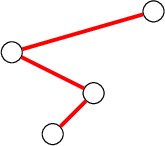

In [10]:
viewLatex(ip.lower_binary_tree())

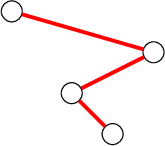

In [11]:
viewLatex(ip.upper_binary_tree())

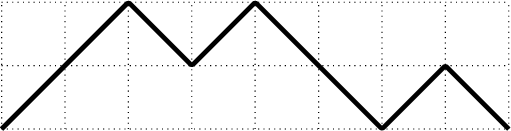

In [12]:
viewLatex(ip.lower_dyck_word())

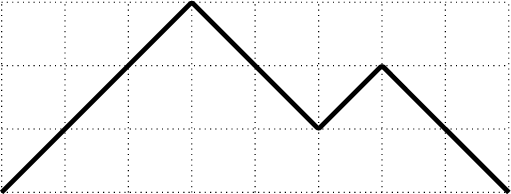

In [13]:
viewLatex(ip.upper_dyck_word())

In [14]:
for bt in ip.binary_trees():
    print(bt)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(bt)? (<ipython-input-14-f190171793af>, line 2)

In [16]:
for dw in ip.dyck_words():
    print(dw)

((())())
((()))()
(()()())
(()())()


## The composition of interval-posets

In [1], we define a composition of interval-posets. Below are the methods corresponding to this composition. 

In [17]:
def left_product(ip1,ip2):
    size = ip1.size() + ip2.size()
    # Juxtaposition of ip1 and shifted ip2
    relations = list(ip1._cover_relations) + [(i+ip1.size(),j+ip1.size()) for (i,j) in ip2._cover_relations]
    # Increasing relations between ip1 and the first vertex of ip2
    relations+= [(i,ip1.size()+1) for i in ip1.increasing_roots()]
    return TamariIntervalPoset(size,relations)
    
def right_product(ip1, ip2):
    size = ip1.size() + ip2.size()
    # Juxtaposition of ip1 and shifted ip2
    relations = list(ip1._cover_relations) + [(i+ip1.size(),j+ip1.size()) for (i,j) in ip2._cover_relations]
    # First element: no extra decreasing relation
    yield TamariIntervalPoset(size,relations)
    for j in ip2.decreasing_roots():
        # Adding decreasing relations 1 by 1
        relations.append((j+ip1.size(),ip1.size()))
        yield TamariIntervalPoset(size,relations)
        
def composition(ip1,ip2):
    u = TamariIntervalPoset(1,[])
    left = left_product(ip1,u)
    for r in right_product(left,ip2):
        yield r

Here is an example of computation that corresponds to Figure 13 of [1]. 

In [18]:
ip1 = TamariIntervalPoset(3,[(1,2),(3,2)])
ip2 = TamariIntervalPoset(4,[(2,3),(4,3)])
r = list(composition(ip1,ip2))
r

[The Tamari interval of size 8 induced by relations [(1, 2), (2, 4), (3, 4), (6, 7), (8, 7), (3, 2)],
 The Tamari interval of size 8 induced by relations [(1, 2), (2, 4), (3, 4), (6, 7), (8, 7), (5, 4), (3, 2)],
 The Tamari interval of size 8 induced by relations [(1, 2), (2, 4), (3, 4), (6, 7), (8, 7), (6, 4), (5, 4), (3, 2)],
 The Tamari interval of size 8 induced by relations [(1, 2), (2, 4), (3, 4), (6, 7), (8, 7), (7, 4), (6, 4), (5, 4), (3, 2)]]

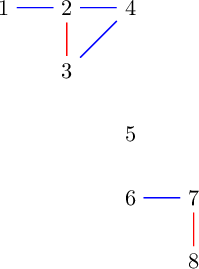

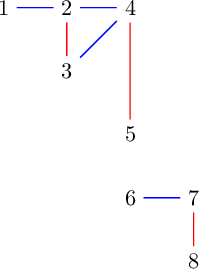

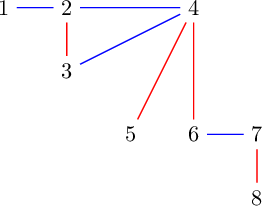

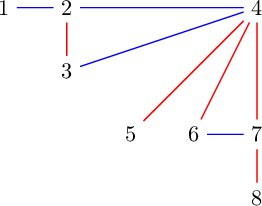

In [19]:
viewLatex(r)

There is also a $m$-composition defined in [1] which is implemented below. 

In [20]:
def right_product_dim(ip1,ip2):
    size = ip1.size() + ip2.size()
    # Juxtaposition of ip1 and shifted ip2
    relations = list(ip1._cover_relations) + [(i+ip1.size(),j+ip1.size()) for (i,j) in ip2._cover_relations]
    for j in ip2.decreasing_roots():
        # Adding decreasing relations 1 by 1
        relations.append((j+ip1.size(),ip1.size()))
        yield TamariIntervalPoset(size,relations)
        
def mcomposition(ips):
    rights = ips[1:] # we take the list of intervals excpect the first one
    def compute_rights(rights): # we define a recursive method to compute the right part
        u = TamariIntervalPoset(1,[])
        if len(rights)==1:
            for r in right_product(u,rights[0]):
                yield r
        else:
            for r1 in compute_rights(rights[1:]):
                r1 = left_product(r1,rights[0])
                for r2 in right_product_dim(u,r1):
                    yield r2
    for r in compute_rights(rights):
        yield left_product(ips[0],r)

Here is an example corresponding to (4.16) of [1]. 

In [21]:
ip1 = TamariIntervalPoset(2,[(2,1)])
ip2 = TamariIntervalPoset(4,[(2,1),(4,3),(2,3)])
ip3 = ip1
r = list(mcomposition([ip1,ip2,ip3]))
r

[The Tamari interval of size 10 induced by relations [(1, 3), (2, 3), (4, 7), (5, 7), (6, 7), (8, 9), (10, 9), (8, 7), (6, 5), (4, 3), (2, 1)],
 The Tamari interval of size 10 induced by relations [(1, 3), (2, 3), (4, 7), (5, 7), (6, 7), (8, 9), (10, 9), (8, 7), (6, 5), (5, 3), (4, 3), (2, 1)],
 The Tamari interval of size 10 induced by relations [(1, 3), (2, 3), (4, 7), (5, 7), (6, 7), (8, 9), (10, 9), (8, 7), (7, 3), (6, 5), (5, 3), (4, 3), (2, 1)],
 The Tamari interval of size 10 induced by relations [(1, 3), (2, 3), (4, 7), (5, 7), (6, 7), (8, 9), (10, 9), (9, 3), (8, 7), (7, 3), (6, 5), (5, 3), (4, 3), (2, 1)],
 The Tamari interval of size 10 induced by relations [(1, 3), (2, 3), (4, 7), (5, 7), (6, 7), (8, 9), (10, 9), (8, 7), (6, 5), (5, 4), (4, 3), (2, 1)],
 The Tamari interval of size 10 induced by relations [(1, 3), (2, 3), (4, 7), (5, 7), (6, 7), (8, 9), (10, 9), (8, 7), (7, 3), (6, 5), (5, 4), (4, 3), (2, 1)],
 The Tamari interval of size 10 induced by relations [(1, 3), (2

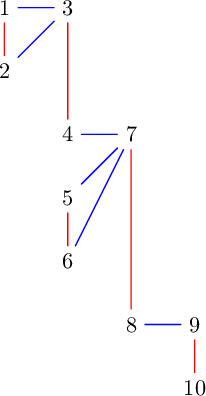

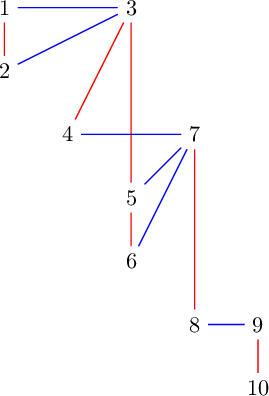

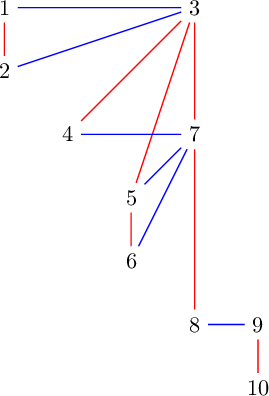

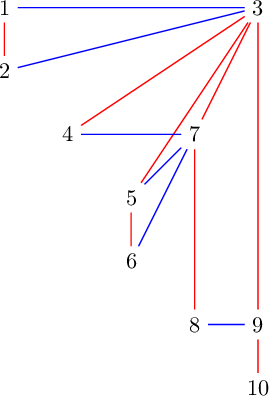

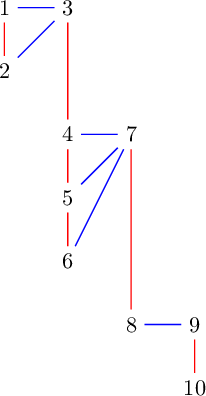

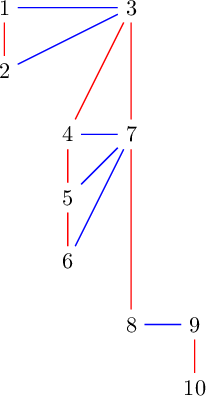

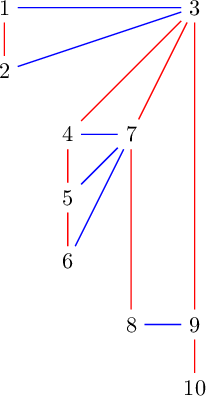

In [22]:
viewLatex(r)